In [1]:
import yfinance as yf
import pandas as pd

In [2]:
data = yf.download("AMZN",period = "1y")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-20,93.860001,97.349998,93.199997,97.250000,97.250000,67481500
2023-01-23,97.559998,97.779999,95.860001,97.519997,97.519997,76501100
2023-01-24,96.930000,98.089996,96.000000,96.320000,96.320000,66929500
2023-01-25,92.559998,97.239998,91.519997,97.180000,97.180000,94261600
2023-01-26,98.239998,99.489998,96.919998,99.220001,99.220001,68523600
...,...,...,...,...,...,...
2024-01-12,155.389999,156.199997,154.009995,154.619995,154.619995,40460300
2024-01-16,153.529999,154.990005,152.149994,153.160004,153.160004,41384600
2024-01-17,151.490005,152.149994,149.910004,151.710007,151.710007,34953400


In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df = data['Close']
print(df)

Date
2023-01-20     97.250000
2023-01-23     97.519997
2023-01-24     96.320000
2023-01-25     97.180000
2023-01-26     99.220001
                 ...    
2024-01-12    154.619995
2024-01-16    153.160004
2024-01-17    151.710007
2024-01-18    153.500000
2024-01-19    155.339996
Name: Close, Length: 251, dtype: float64


Text(0.5, 1.0, 'Trend of Closing Price')

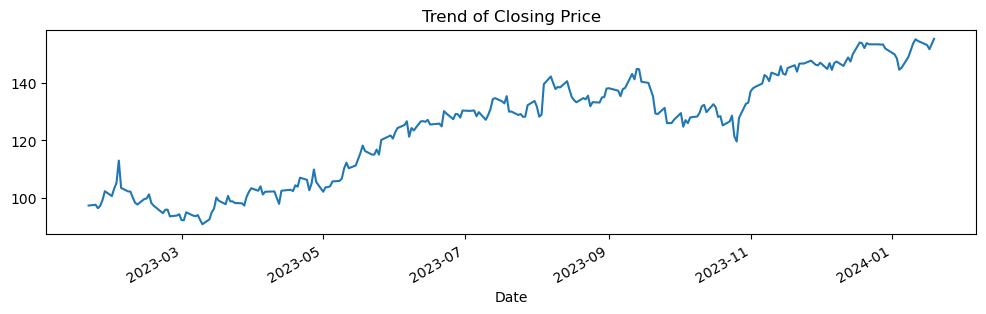

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
df.plot(linewidth = 1.5)
plt.title("Trend of Closing Price")

In [6]:
df1 = df.reset_index()
df1

,Date,Close
0,2023-01-20,97.250000
1,2023-01-23,97.519997
2,2023-01-24,96.320000
3,2023-01-25,97.180000
4,2023-01-26,99.220001
...,...,...
246,2024-01-12,154.619995
247,2024-01-16,153.160004
248,2024-01-17,151.710007
249,2024-01-18,153.500000


In [7]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [8]:
# df1['Date'] = pd.to_datetime(df1['Date'])    #### This is the way for conversion of your datetime object
df1['Day'] = df1['Date'].dt.day

In [9]:
df1['month'] = df1['Date'].dt.month
df1['weekday'] = df1['Date'].dt.day_name()

In [10]:
df1

,Date,Close,Day,month,weekday
0,2023-01-20,97.250000,20,1,Friday
1,2023-01-23,97.519997,23,1,Monday
2,2023-01-24,96.320000,24,1,Tuesday
3,2023-01-25,97.180000,25,1,Wednesday
4,2023-01-26,99.220001,26,1,Thursday
...,...,...,...,...,...
246,2024-01-12,154.619995,12,1,Friday
247,2024-01-16,153.160004,16,1,Tuesday
248,2024-01-17,151.710007,17,1,Wednesday
249,2024-01-18,153.500000,18,1,Thursday


<Axes: xlabel='Day'>

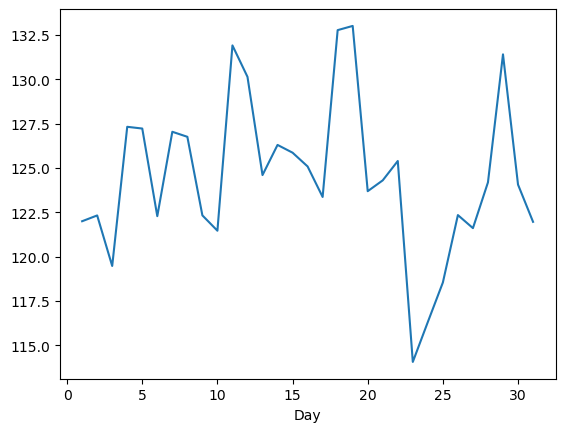

In [11]:
df1.groupby('Day')['Close'].mean().plot()

<Axes: xlabel='weekday'>

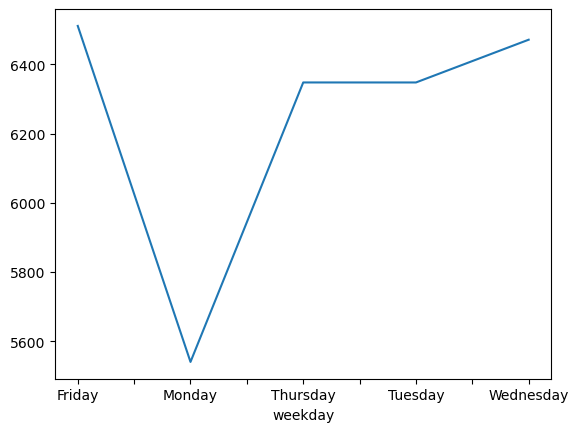

In [12]:
df1.groupby('weekday')['Close'].sum().plot()

In [13]:
df1.groupby('weekday')['Close'].mean().sort_index()

weekday
Friday       125.213077
Monday       123.117334
Thursday     124.465490
Tuesday      124.464902
Wednesday    124.447117
Name: Close, dtype: float64

In [14]:
df

Date
2023-01-20     97.250000
2023-01-23     97.519997
2023-01-24     96.320000
2023-01-25     97.180000
2023-01-26     99.220001
                 ...    
2024-01-12    154.619995
2024-01-16    153.160004
2024-01-17    151.710007
2024-01-18    153.500000
2024-01-19    155.339996
Name: Close, Length: 251, dtype: float64

<Axes: xlabel='Date'>

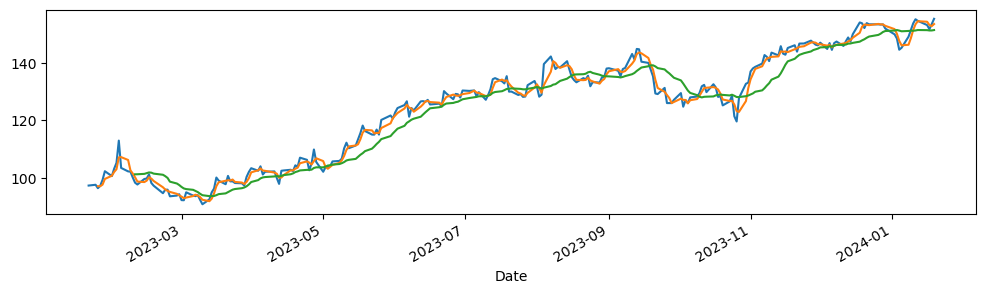

In [15]:
#### Simple Moving Average - 3 , 15 days
plt.figure(figsize=(12,3))
df.plot()
df.rolling(3).mean().plot()
df.rolling(15).mean().plot()

In [16]:
# ARIMA - Forecasting Time Series Data
# Exponential Smoothing
# Simple Smoothing
# Weighted Average (Rolling Average)

<Axes: xlabel='Date'>

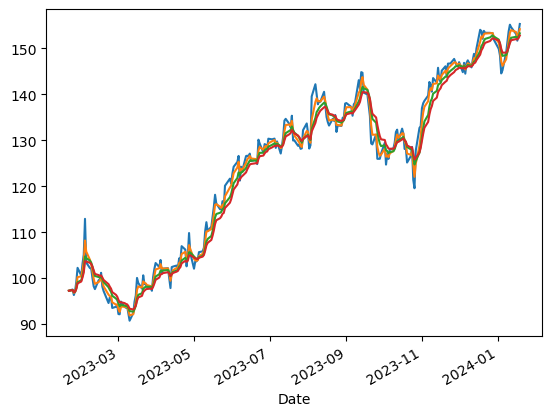

In [17]:
### Emponential Moving average ewm
df.plot()
df.ewm(span = 3).mean().plot()
df.ewm(span=7).mean().plot()
df.ewm(span=10).mean().plot()

In [18]:
# An Arima model is a class of statistical model for analysing and forecasting timeseries data
# It is very powerful and very simple to utilize

In [19]:
#### To check wheather the data is stationary or not - we use adfuller data

In [20]:
from statsmodels.tsa.stattools import adfuller

In [49]:
test_result = adfuller(df)
print(test_result)

(-0.7393985329666061, 0.8362788520314117, 2, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, 1064.980036456989)


In [22]:
df1 = df1[['Date','Close']]
df1

,Date,Close
0,2023-01-20,97.250000
1,2023-01-23,97.519997
2,2023-01-24,96.320000
3,2023-01-25,97.180000
4,2023-01-26,99.220001
...,...,...
246,2024-01-12,154.619995
247,2024-01-16,153.160004
248,2024-01-17,151.710007
249,2024-01-18,153.500000


In [23]:
df1['Close_first_diff'] = df1['Close'] - df1['Close'].shift(1)
df1['Close_first_diff']

C:\Users\admin\AppData\Local\Temp\ipykernel_15448\2859369665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Close_first_diff'] = df1['Close'] - df1['Close'].shift(1)


0           NaN
1      0.269997
2     -1.199997
3      0.860001
4      2.040001
         ...   
246   -0.559998
247   -1.459991
248   -1.449997
249    1.789993
250    1.839996
Name: Close_first_diff, Length: 251, dtype: float64

In [24]:
df1['Close_first_diff']

0           NaN
1      0.269997
2     -1.199997
3      0.860001
4      2.040001
         ...   
246   -0.559998
247   -1.459991
248   -1.449997
249    1.789993
250    1.839996
Name: Close_first_diff, Length: 251, dtype: float64

In [25]:
df1['Close_first_seasonal_diff'] = df1['Close'] - df1['Close'].shift(12)
df1['Close_first_seasonal_diff']

C:\Users\admin\AppData\Local\Temp\ipykernel_15448\3317799252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Close_first_seasonal_diff'] = df1['Close'] - df1['Close'].shift(12)


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
246    1.209991
247   -0.179993
248   -1.669998
249    1.559998
250    5.410004
Name: Close_first_seasonal_diff, Length: 251, dtype: float64

In [26]:
df1['Close_first_diff'].dropna()

1      0.269997
2     -1.199997
3      0.860001
4      2.040001
5      3.019997
         ...   
246   -0.559998
247   -1.459991
248   -1.449997
249    1.789993
250    1.839996
Name: Close_first_diff, Length: 250, dtype: float64

In [27]:
test_result = adfuller(df1['Close_first_diff'].dropna())
test_result

(-12.946922388795157,
 3.44022685713999e-24,
 1,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 1059.9559964730913)

<Axes: >

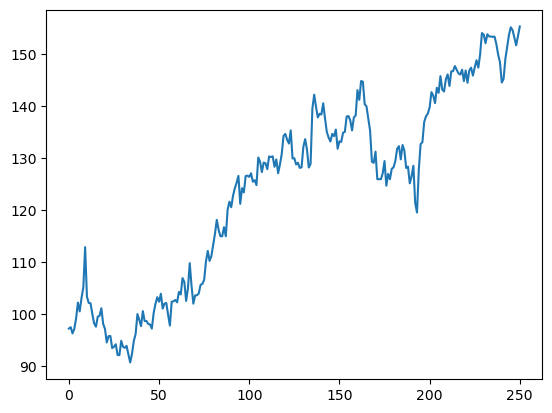

In [28]:
df1['Close'].plot()

<Axes: >

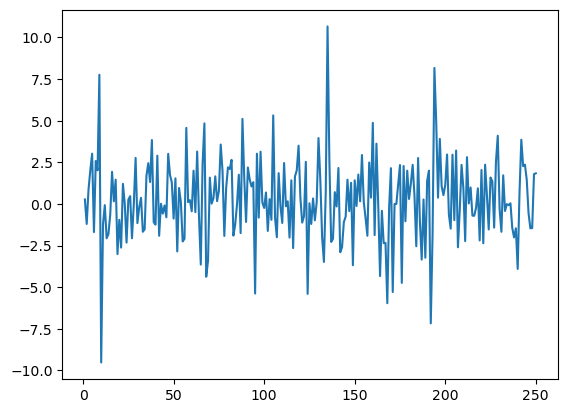

In [29]:
df1['Close_first_diff'].plot()

<Axes: >

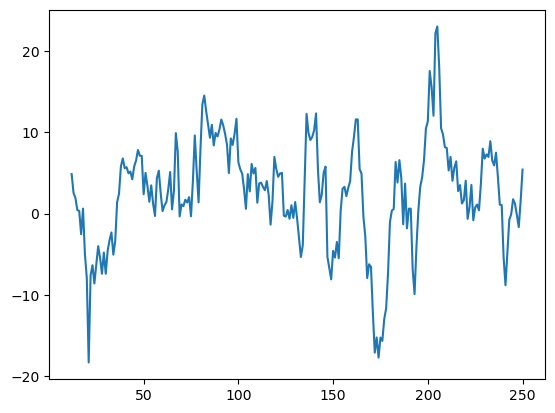

In [30]:
df1['Close_first_seasonal_diff'].plot()

In [31]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

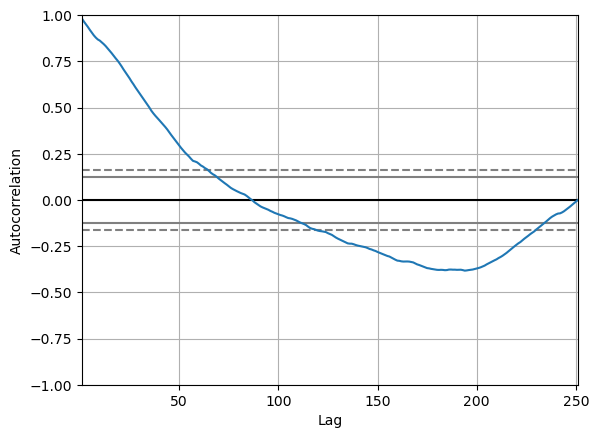

In [32]:
autocorrelation_plot(df1['Close'])

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

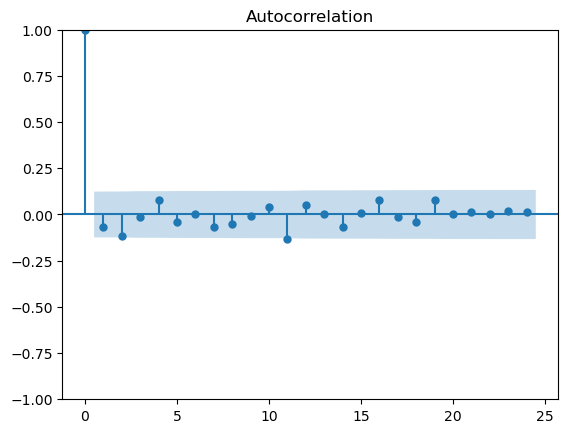

In [34]:
plot_acf(df1['Close_first_diff'].dropna())  #### p = 1
plt.show()

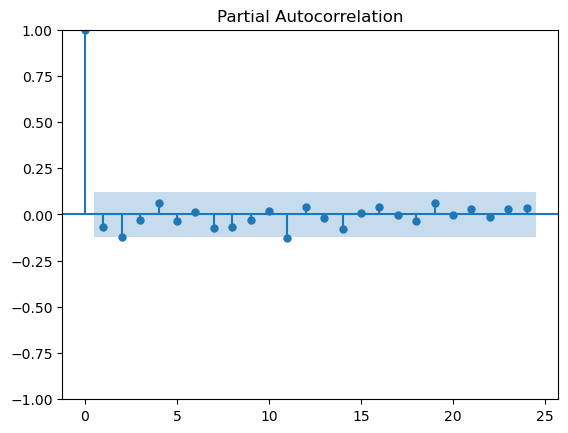

In [35]:
plot_pacf(df1['Close_first_diff'].dropna())  #### q = 1
plt.show()

In [48]:
#### order = p,q,d(1,1,1)
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
model = ARIMA(df1['Close'],order = (1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -576.589
Date:                Sun, 21 Jan 2024   AIC                           1159.179
Time:                        10:50:57   BIC                           1169.743
Sample:                             0   HQIC                          1163.431
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5040      0.430      1.172      0.241      -0.339       1.347
ma.L1         -0.5898      0.403     -1.462      0.144      -1.381       0.201
sigma2         5.8989      0.389     15.167      0.0

<Axes: >

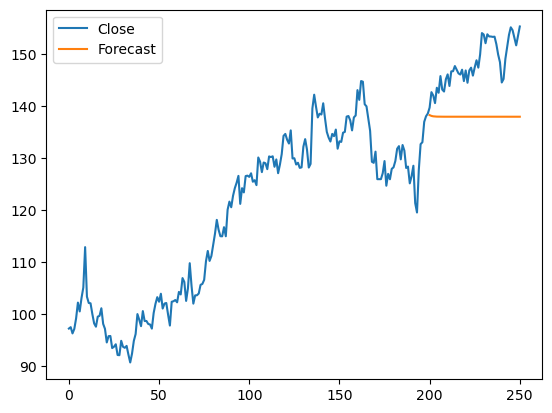

In [37]:
df1['Forecast'] = model_fit.predict(start = 200, end = 260,dynamic = True)
df1[['Close','Forecast']].plot()

In [38]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df1['Close'],order = (1,1,1),seasonal_order = (1,1,1,12))
results = model.fit()
print(results)

<Axes: >

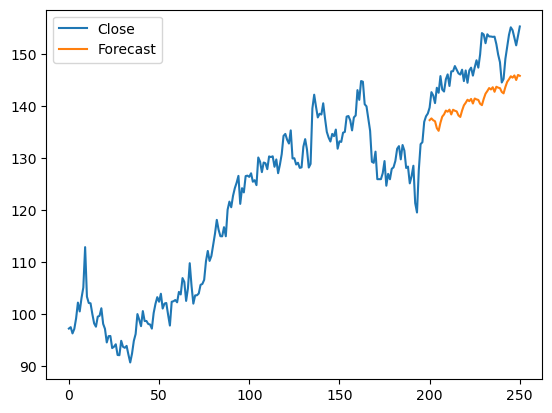

In [39]:
df1['Forecast'] = results.predict(start = 200,end = 270,dynamic = True)
df1[['Close','Forecast']] .plot()

In [40]:
df1

,Date,Close,Close_first_diff,Close_first_seasonal_diff,Forecast
0,2023-01-20,97.250000,NaN,NaN,NaN
1,2023-01-23,97.519997,0.269997,NaN,NaN
2,2023-01-24,96.320000,-1.199997,NaN,NaN
3,2023-01-25,97.180000,0.860001,NaN,NaN
4,2023-01-26,99.220001,2.040001,NaN,NaN
...,...,...,...,...,...
246,2024-01-12,154.619995,-0.559998,1.209991,145.497696
247,2024-01-16,153.160004,-1.459991,-0.179993,145.923114
248,2024-01-17,151.710007,-1.449997,-1.669998,145.051194
249,2024-01-18,153.500000,1.789993,1.559998,146.017786


In [41]:
import pandas as pd
import numpy as np
dd = pd.DataFrame(pd.date_range('2023-12-11','2023-12-15'),columns=['Date'])
dd[['Close','Forecast']] = np.nan

In [42]:
dd.set_index('Date',inplace = True)

In [43]:
# st = dd['Date'][0]
# st

In [44]:
# en =dd['Date'][4]
# en

In [45]:
df1

,Date,Close,Close_first_diff,Close_first_seasonal_diff,Forecast
0,2023-01-20,97.250000,NaN,NaN,NaN
1,2023-01-23,97.519997,0.269997,NaN,NaN
2,2023-01-24,96.320000,-1.199997,NaN,NaN
3,2023-01-25,97.180000,0.860001,NaN,NaN
4,2023-01-26,99.220001,2.040001,NaN,NaN
...,...,...,...,...,...
246,2024-01-12,154.619995,-0.559998,1.209991,145.497696
247,2024-01-16,153.160004,-1.459991,-0.179993,145.923114
248,2024-01-17,151.710007,-1.449997,-1.669998,145.051194
249,2024-01-18,153.500000,1.789993,1.559998,146.017786


In [46]:
import warnings
warnings.filterwarnings('ignore')
# Forecast for the next 3 years
forecast = results.predict(start = len(df1),
                          end = (len(df1)-1) + 3 *12,
                          typ = 'levels').rename('Forecast')

<Axes: >

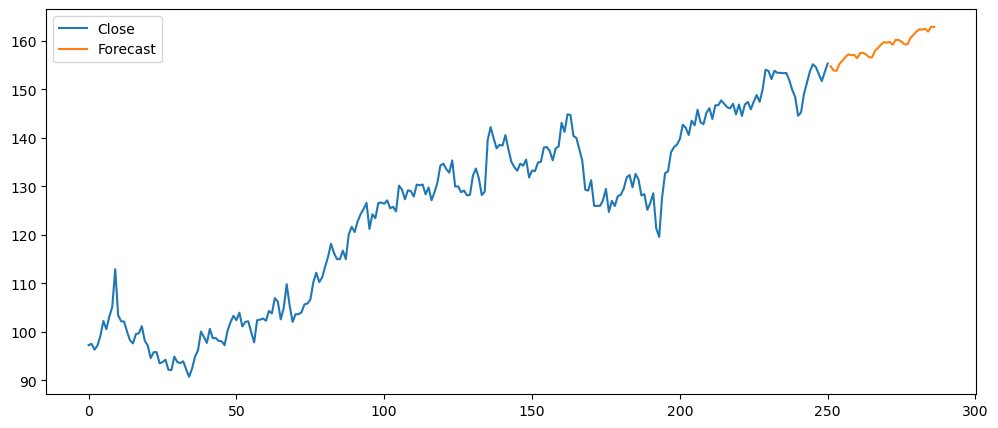

In [47]:
df1['Close'].plot(figsize = (12,5),legend = True)
forecast.plot(legend = True)